<a href="https://colab.research.google.com/github/atul1234anand/fastai/blob/master/Prg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import*
from fastai.vision import*
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.PETS)
path


PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_ann = path/'annotations'
path_im = path/'images'

 A data bunch contains the training data, validation data and the test data. Here the data is stored along with its labels(Eg: Images and label, text and labels etc).Normailize is used to make the mean and standard deviation of your data normal.

In [6]:
fname = get_image_files(path_im)
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_im,fname,pat,ds_tfms = get_transforms(),size=224)
data.normalize(imagenet_stats)


ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yorkshire_terrier,Bombay,boxer,boxer,leonberger
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
basset_hound,american_bulldog,Egyptian_Mau,saint_bernard,newfoundland
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

Using the show batch method we can show the content of the batch file (image + image name)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37


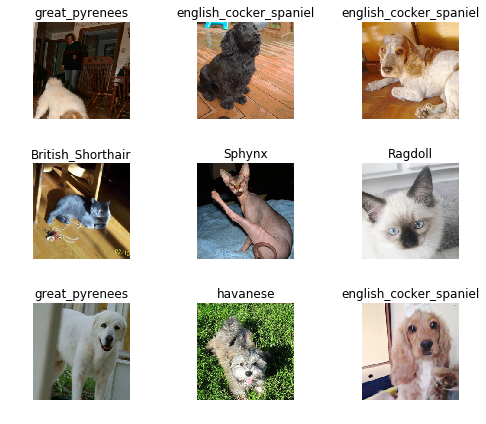

In [7]:
data.show_batch(rows=3, figsize=(7,6))
print(data.classes)
print(len(data.classes))

Here we are building a model that works on a perviously built model called resnet34 which had a large collection of images. This follows the concept of transfer learning where we use one previously built data set to engineer better, more fine tuned datasets. Validation set is a set that our model never gets to look at and metrics mentioned below essentiallly work on this validation set. Data batch contains the validation set.

In [8]:
learner = cnn_learner(data,models.resnet34,metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 67707476.29it/s]


In [9]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.398289,0.321670,0.091340,01:29
1,0.556899,0.248179,0.078484,01:27
2,0.355978,0.209343,0.071719,01:26
3,0.258034,0.191630,0.062923,01:26
